<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.529069,86.009972,85.686221,-9.557483,222.667779,-2312.376903,2535.044682
1,0.0,1.0,24.938770,84.783922,77.263890,-3585.323306,-3388.336725,-1902.121358,-1486.215367
2,0.0,2.0,73.425076,90.854368,84.808369,-6686.333731,-6427.245917,-1917.451844,-4509.794073
3,0.0,3.0,65.185523,63.554195,84.416816,-5471.588136,-5248.431601,-2234.745232,-3013.686369
4,0.0,4.0,65.857108,95.689004,21.894260,13485.883670,13679.324042,3475.472726,10203.851316
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,37.735332,96.678827,27.839114,-7903.445662,-7731.192390,-4206.965176,-3524.227214
59996,999.0,56.0,57.396908,85.763269,50.120222,-1219.756524,-1016.476125,-2034.535175,1018.059049
59997,999.0,57.0,49.389456,27.913766,24.219047,727.829668,839.351937,317.701406,521.650531
59998,999.0,58.0,41.875419,42.110650,21.341881,-1027.895345,-912.567395,-987.468491,74.901096


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    50.529069  86.009972  85.686221     -9.557483    222.667779   
      1.0    24.938770  84.783922  77.263890  -3585.323306  -3388.336725   
      2.0    73.425076  90.854368  84.808369  -6686.333731  -6427.245917   
      3.0    65.185523  63.554195  84.416816  -5471.588136  -5248.431601   
      4.0    65.857108  95.689004  21.894260  13485.883670  13679.324042   
...                ...        ...        ...           ...           ...   
999.0 55.0   37.735332  96.678827  27.839114  -7903.445662  -7731.192390   
      56.0   57.396908  85.763269  50.120222  -1219.756524  -1016.476125   
      57.0   49.389456  27.913766  24.219047    727.829668    839.351937   
      58.0   41.875419  42.110650  21.341881  -1027.895345   -912.567395   
      59.0   61.235164  36.545933  46.676892   1150.454664   1304.912652   

                   y_hat         e_hat  
rep   index                             
0.0   0.0   -2312.376903   2535.044682  
      1.0   -1902.121358  -1486.215367  
      2.0   -1917.451844  -4509.794073  
      3.0   -2234.745232  -3013.686369  
      4.0    3475.472726  10203.851316  
...                  ...           ...  
999.0 55.0  -4206.965176  -3524.227214  
      56.0  -2034.535175   1018.059049  
      57.0    317.701406    521.650531  
      58.0   -987.468491     74.901096  
      59.0    913.613168    391.299484  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    50.529069  86.009972  85.686221     -9.557483    222.667779   
      1.0    24.938770  84.783922  77.263890  -3585.323306  -3388.336725   
      2.0    73.425076  90.854368  84.808369  -6686.333731  -6427.245917   
      3.0    65.185523  63.554195  84.416816  -5471.588136  -5248.431601   
      4.0    65.857108  95.689004  21.894260  13485.883670  13679.324042   
...                ...        ...        ...           ...           ...   
999.0 55.0   37.735332  96.678827  27.839114  -7903.445662  -7731.192390   
      56.0   57.396908  85.763269  50.120222  -1219.756524  -1016.476125   
      57.0   49.389456  27.913766  24.219047    727.829668    839.351937   
      58.0   41.875419  42.110650  21.341881  -1027.895345   -912.567395   
      59.0   61.235164  36.545933  46.676892   1150.454664   1304.912652   

                   y_hat         e_hat  
rep   index                             
0.0   0.0   -2312.376903   2535.044682  
      1.0   -1902.121358  -1486.215367  
      2.0   -1917.451844  -4509.794073  
      3.0   -2234.745232  -3013.686369  
      4.0    3475.472726  10203.851316  
...                  ...           ...  
999.0 55.0  -4206.965176  -3524.227214  
      56.0  -2034.535175   1018.059049  
      57.0    317.701406    521.650531  
      58.0   -987.468491     74.901096  
      59.0    913.613168    391.299484  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.529069,86.009972,85.686221,-9.557483,222.667779,-2312.376903,2535.044682
1,0.0,1.0,24.938770,84.783922,77.263890,-3585.323306,-3388.336725,-1902.121358,-1486.215367
2,0.0,2.0,73.425076,90.854368,84.808369,-6686.333731,-6427.245917,-1917.451844,-4509.794073
3,0.0,3.0,65.185523,63.554195,84.416816,-5471.588136,-5248.431601,-2234.745232,-3013.686369
4,0.0,4.0,65.857108,95.689004,21.894260,13485.883670,13679.324042,3475.472726,10203.851316
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,37.735332,96.678827,27.839114,-7903.445662,-7731.192390,-4206.965176,-3524.227214
59996,999.0,56.0,57.396908,85.763269,50.120222,-1219.756524,-1016.476125,-2034.535175,1018.059049
59997,999.0,57.0,49.389456,27.913766,24.219047,727.829668,839.351937,317.701406,521.650531
59998,999.0,58.0,41.875419,42.110650,21.341881,-1027.895345,-912.567395,-987.468491,74.901096


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    50.529069  86.009972  85.686221     -9.557483    222.667779   
      1.0    24.938770  84.783922  77.263890  -3585.323306  -3388.336725   
      2.0    73.425076  90.854368  84.808369  -6686.333731  -6427.245917   
      3.0    65.185523  63.554195  84.416816  -5471.588136  -5248.431601   
      4.0    65.857108  95.689004  21.894260  13485.883670  13679.324042   
...                ...        ...        ...           ...           ...   
999.0 55.0   37.735332  96.678827  27.839114  -7903.445662  -7731.192390   
      56.0   57.396908  85.763269  50.120222  -1219.756524  -1016.476125   
      57.0   49.389456  27.913766  24.219047    727.829668    839.351937   
      58.0   41.875419  42.110650  21.341881  -1027.895345   -912.567395   
      59.0   61.235164  36.545933  46.676892   1150.454664   1304.912652   

                   y_hat         e_hat  
rep   index                             
0.0   0.0   -2312.376903   2535.044682  
      1.0   -1902.121358  -1486.215367  
      2.0   -1917.451844  -4509.794073  
      3.0   -2234.745232  -3013.686369  
      4.0    3475.472726  10203.851316  
...                  ...           ...  
999.0 55.0  -4206.965176  -3524.227214  
      56.0  -2034.535175   1018.059049  
      57.0    317.701406    521.650531  
      58.0   -987.468491     74.901096  
      59.0    913.613168    391.299484  

[60000 rows x 7 columns]

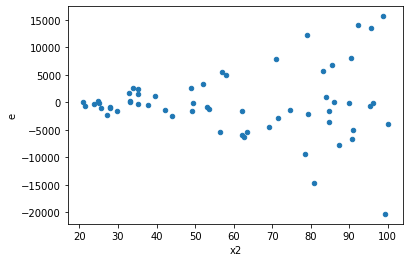

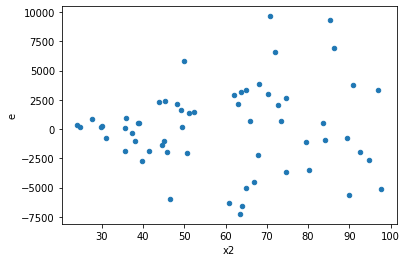

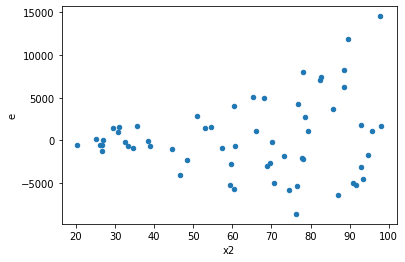

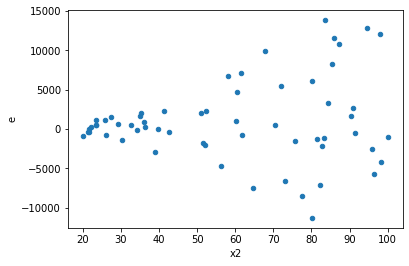

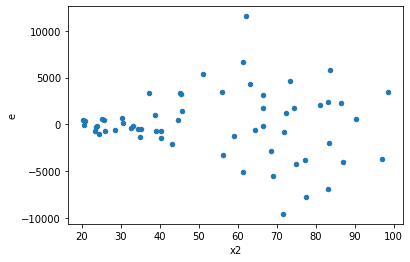

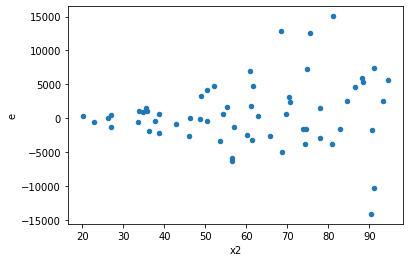

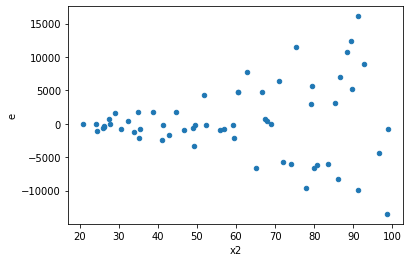

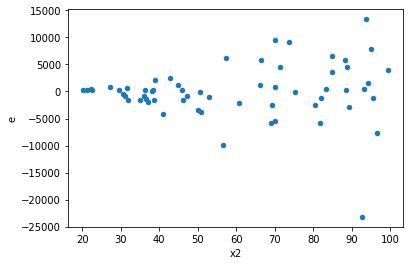

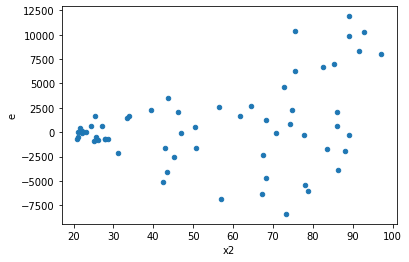

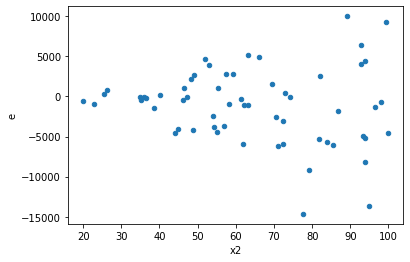

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,25.0,29.0,383276377.533146,682236387.1469791,15331055.101325842,23525392.660240658,1.5344927341762775,0.26682061967199155,0.8665896901640042,0.13341030983599578,Reject001=1 : Homoscedasticity
6.0,28.0,26.0,373728860.7060036,1358784700.4229681,13347459.3109287,52260950.01626801,3.9154230628354507,0.0007839360197534617,0.9996080319901233,0.00039196800987673086,Reject001=0 : Heteroscedasticity
7.0,32.0,22.0,320514282.5436579,998965742.8171666,10016071.32948931,45407533.764416665,4.533467491463228,0.000470140722104162,0.9997649296389479,0.000235070361052081,Reject001=0 : Heteroscedasticity
9.0,29.0,25.0,207068184.47610402,1008764323.1046993,7140282.223313931,40350572.92418797,5.651117373545573,3.7118250862056e-05,0.999981440874569,1.8559125431028e-05,Reject001=0 : Heteroscedasticity
10.0,39.0,15.0,1039269925.1259245,411472625.9406763,26647946.798100628,27431508.396045085,1.0294042015274627,0.99794263724691,0.501028681376545,0.498971318623455,Reject001=1 : Homoscedasticity
11.0,43.0,11.0,636922793.5086315,252487746.61328536,14812157.988572825,22953431.51029867,1.5496345318492157,0.44018172586497695,0.7799091370675115,0.22009086293248847,Reject001=1 : Homoscedasticity
12.0,28.0,26.0,48204118.365855284,674825005.7320373,1721575.655923403,25954807.912770666,15.07619361569635,8.557732300573662e-10,0.9999999995721134,4.278866150286831e-10,Reject001=0 : Heteroscedasticity
14.0,25.0,29.0,589594009.1848286,1018717501.004127,23583760.367393147,35128189.68979748,1.4895075739645676,0.3011062325164606,0.8494468837417697,0.1505531162582303,Reject001=1 : Homoscedasticity
15.0,40.0,14.0,402798887.8085309,603567884.2472799,10069972.195213273,43111991.73194856,4.281242380434943,0.00512288974015962,0.9974385551299202,0.00256144487007981,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,25.0,922084097.5251153,670059536.3114985,31796003.36293501,26802381.452459943,0.8429481261064341,0.6535670175106288,Reject001=1 : Homoscedasticity
1.0,24.0,30.0,452192601.8470068,291190284.77567786,18841358.41029195,9706342.82585593,0.5151615193814216,0.0994364022971906,Reject001=1 : Homoscedasticity
2.0,24.0,30.0,806922814.1170386,306205527.8015509,33621783.92154328,10206850.926718364,0.3035785058441913,0.003805897471040715,Reject001=0 : Heteroscedasticity
3.0,30.0,24.0,898382393.8294148,331901104.9747493,29946079.79431383,13829212.707281223,0.4618037753945716,0.046060766257719134,Reject001=1 : Homoscedasticity
4.0,21.0,33.0,284315904.37278044,262078558.07239872,13538852.58918002,7941774.487042385,0.5865913994358202,0.20179890813677204,Reject001=1 : Homoscedasticity
5.0,25.0,29.0,383276377.533146,682236387.1469791,15331055.101325842,23525392.660240658,1.5344927341762775,0.26682061967199155,Reject001=1 : Homoscedasticity
6.0,28.0,26.0,373728860.7060036,1358784700.4229681,13347459.3109287,52260950.01626801,3.9154230628354507,0.0007839360197534617,Reject001=0 : Heteroscedasticity
7.0,32.0,22.0,320514282.5436579,998965742.8171666,10016071.32948931,45407533.764416665,4.533467491463228,0.000470140722104162,Reject001=0 : Heteroscedasticity
8.0,31.0,23.0,673631700.6281201,81534404.62502706,21730054.858971614,3544974.1141316113,0.16313691507631006,5.488797037518451e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    542
Reject001=1 : Homoscedasticity      458
Name: Result_test, dtype: int64